In [3]:
from bw_temporalis import easy_timedelta_distribution, easy_datetime_distribution, TemporalisLCA, Timeline, TemporalDistribution
from bw_temporalis.lcia import characterize_methane, characterize_co2
import bw2data as bd
import bw2calc as bc
import bw_graph_tools as graph
import numpy as np
import pandas as pd

In [4]:
bd.projects.set_current("Temporalis example project")

In [5]:
bd.Database('AGWP_multi_CO2').write({
    ('AGWP_multi_CO2', "CO2"): {
        "type": "emission",
        "name": "carbon dioxide",
        "temporalis code": "co2",
    },
    ('AGWP_multi_CO2', 'multi-pulse'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('AGWP_multi_CO2', 'CO2'),
                'temporal_distribution': TemporalDistribution(
                    np.array([0, 1, 50], dtype='timedelta64[Y]'),
                    np.ones(3) * 1/3
                ),
                'type': 'biosphere'
            },
        ],
        'name': 'multi-pulse',
        'type': 'process'
    }
})


07:32:59 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


07:32:59 [info     ] Vacuuming database            


In [13]:
bd.Method(("GWP", "CF_CO2")).write([
    (('AGWP_multi_CO2', "CO2"), 1)
])

In [14]:
lca = bc.LCA({('AGWP_multi_CO2', 'multi-pulse'): 1}, ("GWP", "CF_CO2"))   #FU can be more than 1 thing !
lca.lci()
lca.lcia()

In [15]:
lca = TemporalisLCA(lca)

Starting graph traversal
Calculation count: 0


In [16]:
tl = lca.build_timeline()

In [17]:
tl.build_dataframe()
#shows inventory results

,date,amount,flow,activity
0,2024-11-15 06:34:30,0.333333,5,6
1,2025-11-15 12:23:42,0.333333,5,6
2,2074-11-15 09:34:30,0.333333,5,6


In [18]:
bd.get_node(id=5)

'carbon dioxide' (None, None, None)

<Axes: xlabel='date', ylabel='amount'>

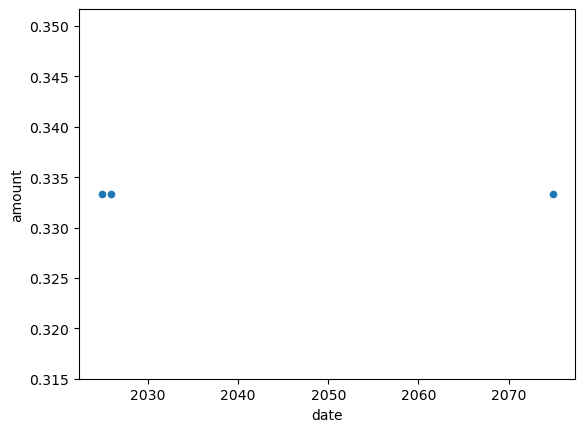

In [19]:
tl.df.plot(x="date", y="amount", kind="scatter")
#dynamic LCI

In [20]:
#Characterisation
characterized_df_co2 = tl.characterize_dataframe(
    characterization_function=characterize_co2, 
    flow={5},   #{bd.get_node(name="carbon dioxide").id}
)

<Axes: xlabel='date', ylabel='amount'>

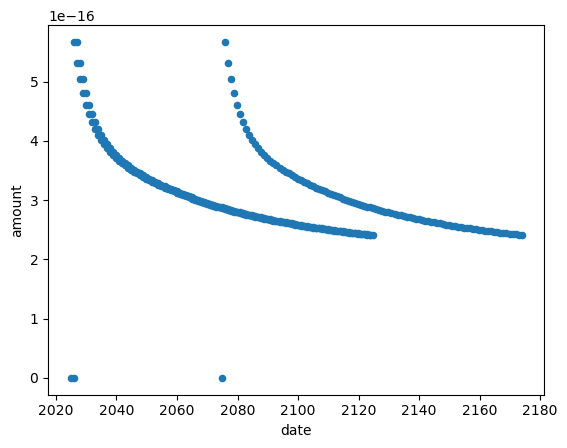

In [21]:
characterized_df_co2.plot(x="date", y="amount", kind="scatter")

<Axes: xlabel='date', ylabel='amount_sum'>

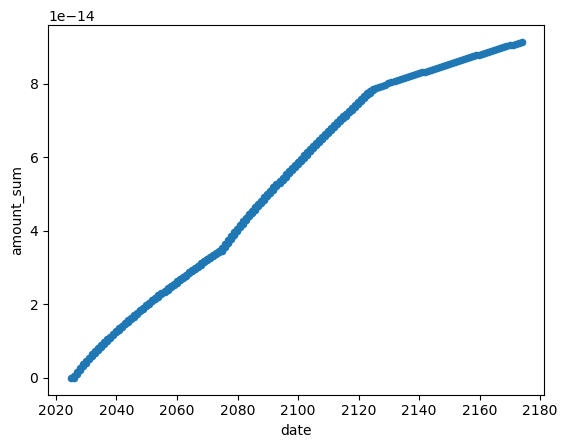

In [22]:
characterized_df_co2.plot(x="date", y="amount_sum", kind="scatter")

In [23]:
characterized_df_co2.amount_sum

0      0.000000e+00
1      0.000000e+00
2      5.668003e-16
3      1.098868e-15
4      1.665669e-15
           ...     
295    9.045645e-14
296    9.069923e-14
297    9.094142e-14
298    9.118302e-14
299    9.142406e-14
Name: amount_sum, Length: 300, dtype: float64

In [26]:
print('AGWP_100 =', characterized_df_co2.amount_sum[100], 'W.yr/m²')

AGWP_100 = 3.49395962857078e-14 W.yr/m²
